# Pre-Experiment Set Up

In [1]:
# Importing the libraries that will be required for this analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Remove warning that will appear when using the KNN classifier

from warnings import simplefilter

simplefilter(action = 'ignore', category = FutureWarning)

# Creation of a function that will be used to check if the grades are within one of a correct prediction 

def find_grade_within_one(x):
    
    if (x['Assessment Grade'] == 'FA' and x['Grade Prediction'] == 'FA'):
        return True
    elif (x['Assessment Grade'] == 'FA' and x['Grade Prediction'] == 'GA'):
        return True
    
    elif (x['Assessment Grade'] == 'GA' and x['Grade Prediction'] == 'FA'):
        return True
    elif (x['Assessment Grade'] == 'GA' and x['Grade Prediction'] == 'GA'):
        return True
    elif (x['Assessment Grade'] == 'GA' and x['Grade Prediction'] == 'B'):
        return True
    
    elif (x['Assessment Grade'] == 'B' and x['Grade Prediction'] == 'GA'):
        return True
    elif (x['Assessment Grade'] == 'B' and x['Grade Prediction'] == 'B'):
        return True
    elif (x['Assessment Grade'] == 'B' and x['Grade Prediction'] == 'C'):
        return True
    
    elif (x['Assessment Grade'] == 'C' and x['Grade Prediction'] == 'B'):
        return True
    elif (x['Assessment Grade'] == 'C' and x['Grade Prediction'] == 'C'):
        return True
    elif (x['Assessment Grade'] == 'C' and x['Grade Prediction'] == 'Start'):
        return True
    
    elif (x['Assessment Grade'] == 'Start' and x['Grade Prediction'] == 'C'):
        return True
    elif (x['Assessment Grade'] == 'Start' and x['Grade Prediction'] == 'Start'):
        return True
    elif (x['Assessment Grade'] == 'Start' and x['Grade Prediction'] == 'Stub'):
        return True
    
    elif (x['Assessment Grade'] == 'Stub' and x['Grade Prediction'] == 'Start'):
        return True
    elif (x['Assessment Grade'] == 'Stub' and x['Grade Prediction'] == 'Stub'):
        return True
    
    else:
        return False

# Experiment 3

## Setting up the training data

#### Reading in the Training Datasets

In [2]:
train_start_df = pd.read_csv(r'C:\Users\Kevin\Desktop\TRAINING-DATA-1-CLEAN.csv')

train_extra_df = pd.read_csv(r'C:\Users\Kevin\Desktop\TRAINING-DATA-2.csv')

#### Minor adjustments to make merging possible 

In [3]:
train_extra_df['Title'] = train_extra_df.apply(lambda x: x['Title'].replace('_', ' '), axis = 1)

train_extra_df.at[177, 'Title'] = '9/11: The Twin Towers'
train_start_df.at[203, 'Title'] = '1, 2, 3, Sun'

#### Merging the two DataFrames using inner join 

In [4]:
train_df = pd.merge(train_start_df, train_extra_df, on = 'Title', how = 'inner')

#### Using the created columns to calculate the missing fields 

In [5]:
train_df['Registered Edits'] = train_df.apply(lambda x: x['Revisions'] - x['IP Edits'] - x['Bot Edits'], axis = 1)
train_df['Major Edits'] = train_df.apply(lambda x: x['Revisions'] - x['Minor Edits'], axis = 1)
train_df['Registered Editors'] = train_df.apply(lambda x: x['Unique Editors'] - x['IP Editors'] - x['Bot Editors'], axis = 1)

#### Final training dataframe 

In [6]:
train_df

,Title,Assessment Grade,Size in Bytes,Revisions,Registered Edits,IP Edits,Bot Edits,Unique Editors,Major Edits,Minor Edits,...,Reverted Edits,Average Time Between Edits,Average Edits Per User,Average Edits Per Day,Average Edits Per Month,Average Edits Per Year,Edits Made By Top 10,Registered Editors,IP Editors,Bot Editors
0,The Empire Strikes Back,FA,212508,7951,5355,2394,202,2997,6455,1496,...,1434,24.0,2.7,1.3,31.5,378.0,1785,1320,1601,76
1,Planet of the Apes,FA,112394,3002,1736,1192,74,917,2479,523,...,308,40.8,3.3,0.8,18.2,218.7,997,378,508,31
2,Fight Club,FA,98321,6501,4207,2113,181,2785,4999,1502,...,1392,26.4,2.3,1.2,28.9,347.1,1848,1178,1563,44
3,Die Hard,FA,185451,5521,3378,1978,165,2616,4408,1113,...,1048,33.6,2.1,0.9,22.3,267.0,1319,1162,1401,53
4,Aliens (film),FA,208412,6412,3985,2227,200,2639,5092,1320,...,1185,26.4,2.4,1.1,26.5,318.1,1525,1143,1430,66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235,123Net,Stub,7375,57,32,15,10,31,43,14,...,1,1694.4,1.8,0.0,0.4,5.2,32,18,7,6
236,Adobe Sign,Stub,6432,39,25,10,4,24,26,13,...,1,904.8,1.6,0.0,0.8,9.7,25,15,5,4
237,AuthenTec,Stub,7098,42,22,11,9,31,32,10,...,1,1972.8,1.4,0.0,0.4,4.4,19,17,7,7
238,Box blade,Stub,2300,24,20,2,2,21,14,10,...,1,4528.8,1.1,0.0,0.2,1.9,12,18,2,1


## Setting up the Testing Data

#### Reading in the Datasets that will be used as testing data

In [7]:
test_start_df = pd.read_csv(r'C:\Users\Kevin\Desktop\TEST-DATA-1-CLEAN.csv')

test_extra_df = pd.read_csv(r'C:\Users\Kevin\Desktop\TEST-DATA-2.csv')

#### Minor adjustments to make the merging possible

In [8]:
test_extra_df['Title'] = test_extra_df.apply(lambda x: x['Title'].replace('_', ' '), axis = 1)

test_extra_df.at[0, 'Title'] = 'The Lord of the Rings (1978 film)'

#### Merging the two DataFrames using inner join 

In [9]:
test_df = pd.merge(test_start_df, test_extra_df, on = 'Title', how = 'inner')

#### Using the created columns to calculate the missing fields 

In [10]:
test_df['Registered Edits'] = test_df.apply(lambda x: x['Revisions'] - x['IP Edits'] - x['Bot Edits'], axis = 1)
test_df['Major Edits'] = test_df.apply(lambda x: x['Revisions'] - x['Minor Edits'], axis = 1)
test_df['Registered Editors'] = test_df.apply(lambda x: x['Unique Editors'] - x['IP Editors'] - x['Bot Editors'], axis = 1)

#### Final testing dataframe

In [11]:
test_df

,Title,Assessment Grade,Size in Bytes,Revisions,Registered Edits,IP Edits,Bot Edits,Unique Editors,Major Edits,Minor Edits,...,Reverted Edits,Average Time Between Edits,Average Edits Per User,Average Edits Per Day,Average Edits Per Month,Average Edits Per Year,Edits Made By Top 10,Registered Editors,IP Editors,Bot Editors
0,The Lord of the Rings (1978 film),FA,71762,1991,1319,575,97,794,1516,475,...,183,86.4,2.5,0.4,8.5,101.5,702,181,575,38
1,Ghostbusters,FA,208171,7243,4447,2571,225,3151,5746,1497,...,1145,24.0,2.3,1.2,29.7,357.0,1631,1313,1771,67
2,Edward Drinker Cope,FA,75975,901,666,145,90,363,588,313,...,95,189.6,2.5,0.2,3.8,46.0,323,220,102,41
3,Cooperative pulling paradigm,FA,86483,769,699,40,30,82,684,85,...,53,62.4,9.4,0.5,11.9,142.3,663,60,12,10
4,Premier League,FA,243349,15529,9215,5950,364,6464,12481,3048,...,2795,12.0,2.4,2.5,59.3,711.7,2179,2508,3888,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,Natalie Alt,Stub,7856,50,40,0,10,26,35,15,...,0,1936.8,1.9,0.0,0.4,4.5,31,19,0,7
92,Ab Bui,Stub,1813,5,2,0,3,4,3,2,...,1,7569.6,1.3,0.0,0.1,1.2,2,1,0,3
93,Ab Chin,Stub,1751,8,4,0,4,7,4,4,...,1,9055.2,1.1,0.0,0.1,1.0,4,3,0,4
94,Act Global,Stub,4709,68,47,15,6,30,56,12,...,6,628.8,2.3,0.0,1.2,14.0,43,19,6,5


## Creating a copy of the Data Frame and converting some fields into percentages

In [12]:
prc_df = train_df.copy()

prc_df['Registered Edits'] = prc_df.apply(lambda x: 100 * (x['Registered Edits'] / x['Revisions']), axis = 1)
prc_df['IP Edits'] = prc_df.apply(lambda x: 100 * (x['IP Edits'] / x['Revisions']), axis = 1)
prc_df['Bot Edits'] = prc_df.apply(lambda x: 100 * (x['Bot Edits'] / x['Revisions']), axis = 1)

prc_df['Major Edits'] = prc_df.apply(lambda x: 100 * (x['Major Edits'] / x['Revisions']), axis = 1)
prc_df['Minor Edits'] = prc_df.apply(lambda x: 100 * (x['Minor Edits'] / x['Revisions']), axis = 1)

prc_df['Semi Auto Edits'] = prc_df.apply(lambda x: 100 * (x['Semi Auto Edits'] / x['Revisions']), axis = 1)
prc_df['Reverted Edits'] = prc_df.apply(lambda x: 100 * (x['Reverted Edits'] / x['Revisions']), axis = 1)

prc_df['Edits Made By Top 10'] = prc_df.apply(lambda x: 100 * (x['Edits Made By Top 10'] / x['Revisions']), axis = 1)

prc_df['Registered Editors'] = prc_df.apply(lambda x: 100 * (x['Registered Editors'] / x['Unique Editors']), axis = 1)
prc_df['IP Editors'] = prc_df.apply(lambda x: 100 * (x['IP Editors'] / x['Unique Editors']), axis = 1)
prc_df['Bot Editors'] = prc_df.apply(lambda x: 100 * (x['Bot Editors'] / x['Unique Editors']), axis = 1)

## Exploratory Data Analysis Plots for Basic Features

#### Full discussion on these plots can be found in the final report

### File Size

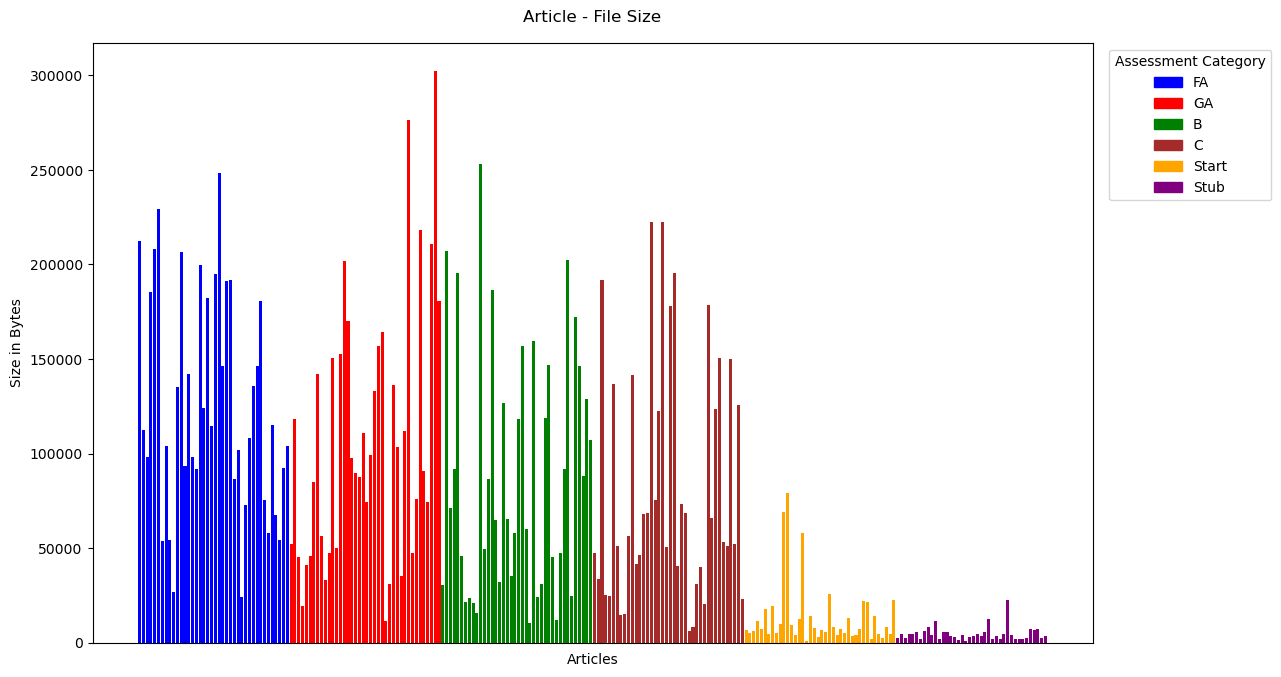

In [13]:
# Assigning colours to each bar based on Article Grade 

col = []

for value in train_df['Assessment Grade']:
    if value == 'FA':
        col.append('blue')
    if value == 'GA':
        col.append('red')
    if value == 'B':
        col.append('green')
    if value == 'C':
        col.append('brown')
    if value == 'Start':
        col.append('orange')
    if value == 'Stub':
        col.append('purple')
        
# Plotting Graph 

fig = plt.figure(figsize = (10, 6))
ax = fig.add_axes([0, 0, 1, 1])
        
ax.bar(train_df['Title'], train_df['Size in Bytes'], color = col)

# Setting all Labels 

ax.set_xticks([])
ax.set_title('Article - File Size', pad = 15)
ax.set_ylabel('Size in Bytes')
ax.set_xlabel('Articles')

# Creating Legend to show Categories

FA = mpatches.Patch(color = 'blue', label = 'FA')
GA = mpatches.Patch(color = 'red', label = 'GA')
B = mpatches.Patch(color = 'green', label = 'B')
C = mpatches.Patch(color = 'brown', label = 'C')
Start = mpatches.Patch(color = 'orange', label = 'Start')
Stub = mpatches.Patch(color = 'purple', label = 'Stub')

# Adding the Legend to the Axis 

ax.legend(handles = [FA, GA, B, C, Start, Stub], title = 'Assessment Category', bbox_to_anchor = (1.01, 1), loc = 'upper left')

# Saving the graph for use in Report 

plt.savefig('FileSize.png', bbox_inches = 'tight')

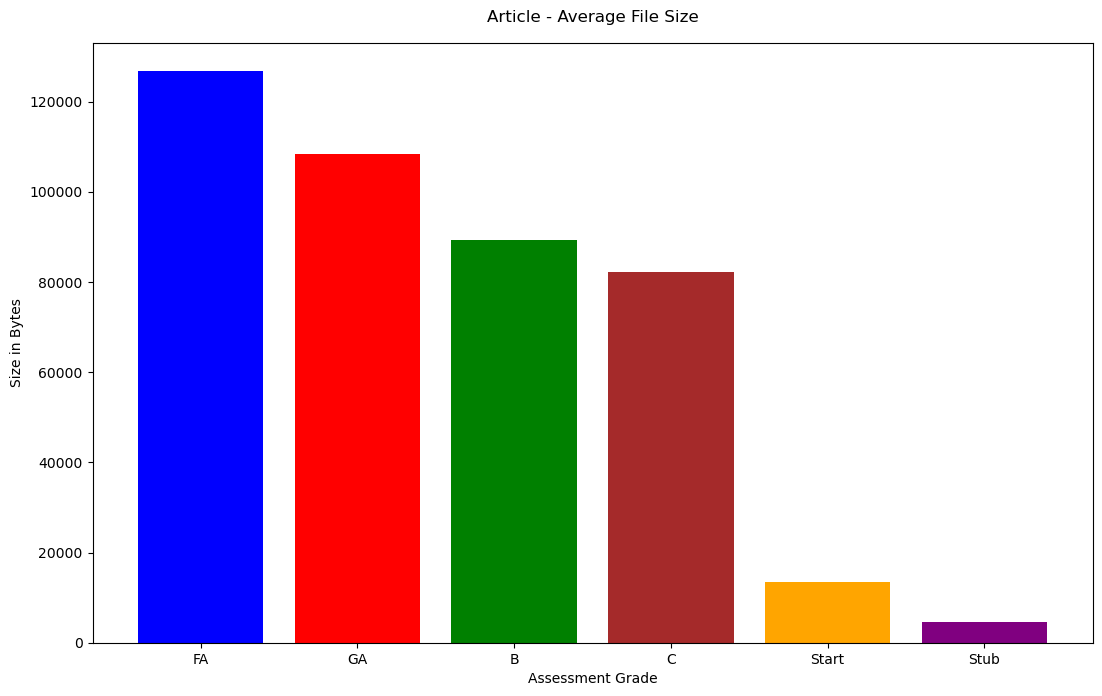

In [14]:
# Creating Pivot Table with averages

file_size_pt = pd.pivot_table(
                                train_df, 
                                values = ['Size in Bytes'], 
                                index = ['Assessment Grade'],
                                aggfunc = { 'Size in Bytes': np.mean }
                              )

# Sort the Pivot Table

file_size_pt_sorted = file_size_pt.sort_values(by = 'Size in Bytes', ascending = False)

# Assigning colours to each bar based on Article Grade 

col = []

for value in file_size_pt_sorted.index:
    if value == 'FA':
        col.append('blue')
    if value == 'GA':
        col.append('red')
    if value == 'B':
        col.append('green')
    if value == 'C':
        col.append('brown')
    if value == 'Start':
        col.append('orange')
    if value == 'Stub':
        col.append('purple')

# Plotting Graph 

fig = plt.figure(figsize = (10, 6))
ax = fig.add_axes([0, 0, 1, 1])

ax.bar(file_size_pt_sorted.index, file_size_pt_sorted['Size in Bytes'], color = col)

# Setting all Labels

ax.set_title("Article - Average File Size", pad = 15)
ax.set_xlabel("Assessment Grade")
ax.set_ylabel("Size in Bytes")

# Saving the graph for use in Report 

plt.savefig('AverageFileSize.png', bbox_inches = 'tight')

## Exploratory Data Analysis Plots for Edit Features

#### Full discussion on these plots can be found in the final report

### Number of Revisions

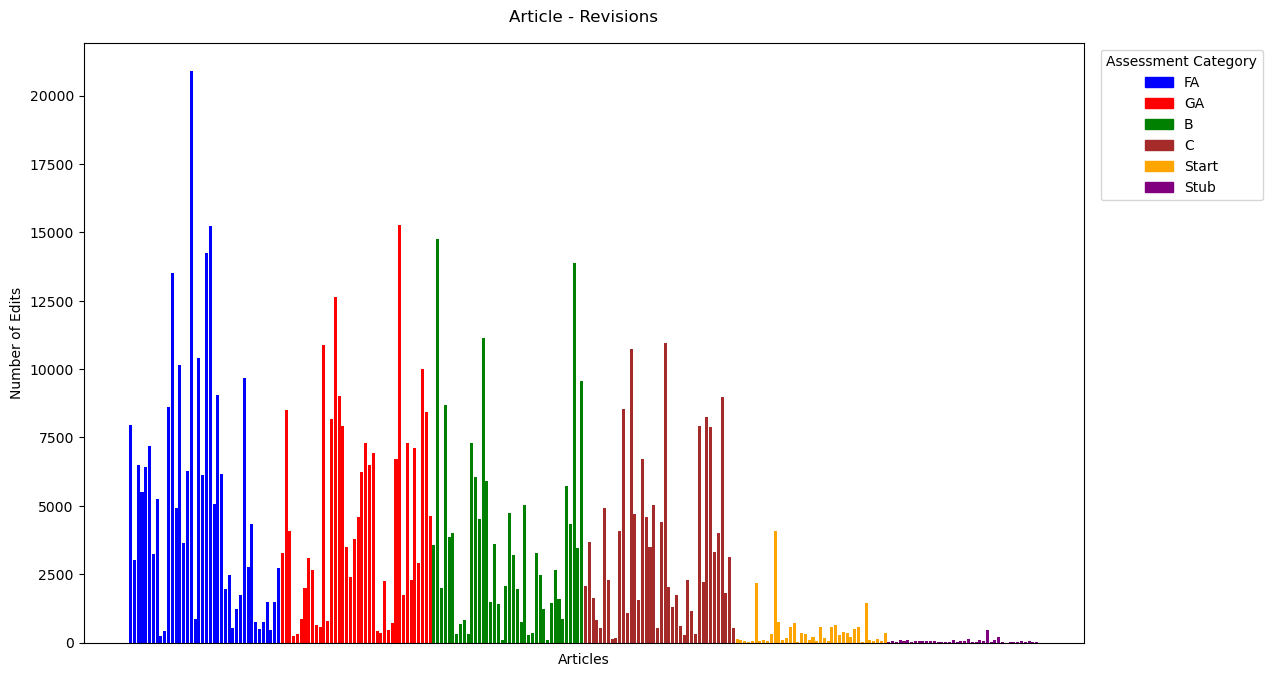

In [15]:
# Assigning colours to each bar based on Article Grade 

col = []

for value in train_df['Assessment Grade']:
    if value == 'FA':
        col.append('blue')
    if value == 'GA':
        col.append('red')
    if value == 'B':
        col.append('green')
    if value == 'C':
        col.append('brown')
    if value == 'Start':
        col.append('orange')
    if value == 'Stub':
        col.append('purple')
        
# Plotting Graph 

fig = plt.figure(figsize = (10, 6))
ax = fig.add_axes([0, 0, 1, 1])
        
ax.bar(train_df['Title'], train_df['Revisions'], color = col)

# Setting all Labels 

ax.set_xticks([])
ax.set_title('Article - Revisions', pad = 15)
ax.set_ylabel('Number of Edits')
ax.set_xlabel('Articles')

# Creating Legend to show Categories

FA = mpatches.Patch(color = 'blue', label = 'FA')
GA = mpatches.Patch(color = 'red', label = 'GA')
B = mpatches.Patch(color = 'green', label = 'B')
C = mpatches.Patch(color = 'brown', label = 'C')
Start = mpatches.Patch(color = 'orange', label = 'Start')
Stub = mpatches.Patch(color = 'purple', label = 'Stub')

# Adding the Legend to the Axis 

ax.legend(handles = [FA, GA, B, C, Start, Stub], title = 'Assessment Category', bbox_to_anchor = (1.01, 1), loc = 'upper left')

# Saving the graph for use in Report 

plt.savefig('Revisions.png', bbox_inches = 'tight')

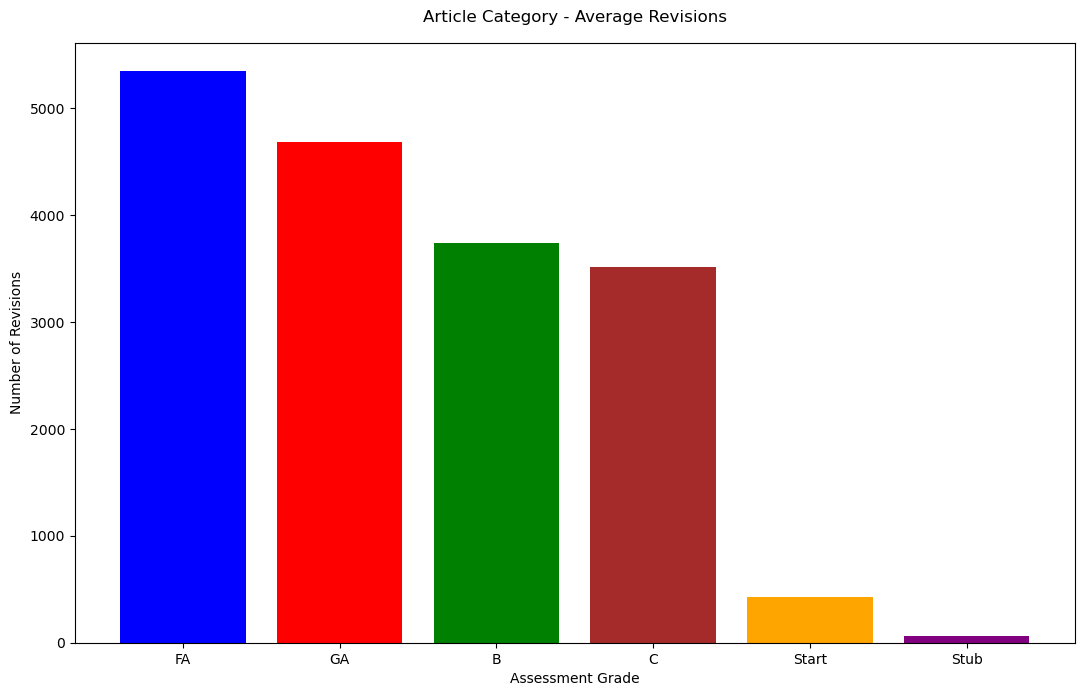

In [16]:
# Creating Pivot Table with averages

revisions_pt = pd.pivot_table(
                                train_df, 
                                values = ['Revisions'], 
                                index = ['Assessment Grade'],
                                aggfunc = { 'Revisions': np.mean }
                              )

# Sort the Pivot Table

revisions_pt_sorted = revisions_pt.sort_values(by = 'Revisions', ascending = False)

# Assigning colours to each bar based on Article Grade 

col = []

for value in revisions_pt_sorted.index:
    if value == 'FA':
        col.append('blue')
    if value == 'GA':
        col.append('red')
    if value == 'B':
        col.append('green')
    if value == 'C':
        col.append('brown')
    if value == 'Start':
        col.append('orange')
    if value == 'Stub':
        col.append('purple')

# Plotting Graph 

fig = plt.figure(figsize = (10, 6))
ax = fig.add_axes([0, 0, 1, 1])

ax.bar(revisions_pt_sorted.index, revisions_pt_sorted['Revisions'], color = col)

# Setting all Labels

ax.set_title("Article Category - Average Revisions", pad = 15)
ax.set_xlabel("Assessment Grade")
ax.set_ylabel("Number of Revisions")

# Saving the graph for use in Report 

plt.savefig('AverageRevisions.png', bbox_inches = 'tight')

### Registered, IP and Bot Edits

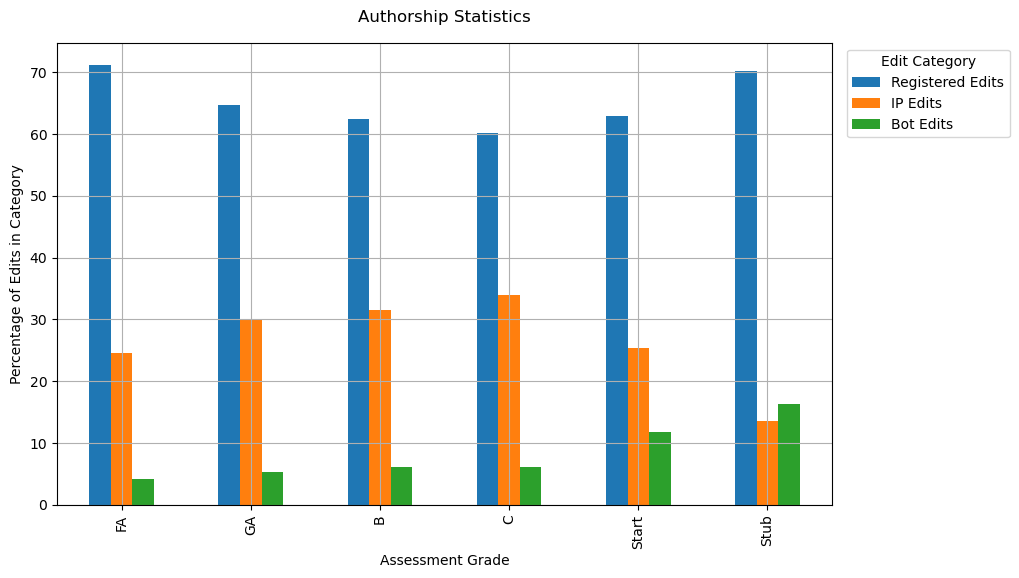

In [17]:
# Creating Pivot Table with averages

authorship_pt = pd.pivot_table(
                                prc_df, 
                                values = ['Registered Edits', 'IP Edits', 'Bot Edits'], 
                                index = ['Assessment Grade'],
                                aggfunc = { 'Registered Edits': np.mean, 'IP Edits': np.mean, 'Bot Edits': np.mean }
                              )

# Sort the Pivot Table

authorship_pt = authorship_pt.reindex(['Registered Edits', 'IP Edits', 'Bot Edits'], axis = 1)
authorship_pt = authorship_pt.reindex(['FA', 'GA', 'B', 'C', 'Start', 'Stub'])

# Plotting Graph 

ax = authorship_pt.plot(kind = 'bar', grid = True)
fig = ax.get_figure()

# Graph Formatting 

fig.set_size_inches(10, 6)

ax.set_title("Authorship Statistics", pad = 15)
ax.set_xlabel("Assessment Grade")
ax.set_ylabel("Percentage of Edits in Category")

# Adding the Legend to the Axis 

ax.legend(title = 'Edit Category', bbox_to_anchor = (1.01, 1), loc = 'upper left')

# Saving the graph for use in Report 

plt.savefig('Authorship.png', bbox_inches = 'tight')

### Edits Made By Top 10 

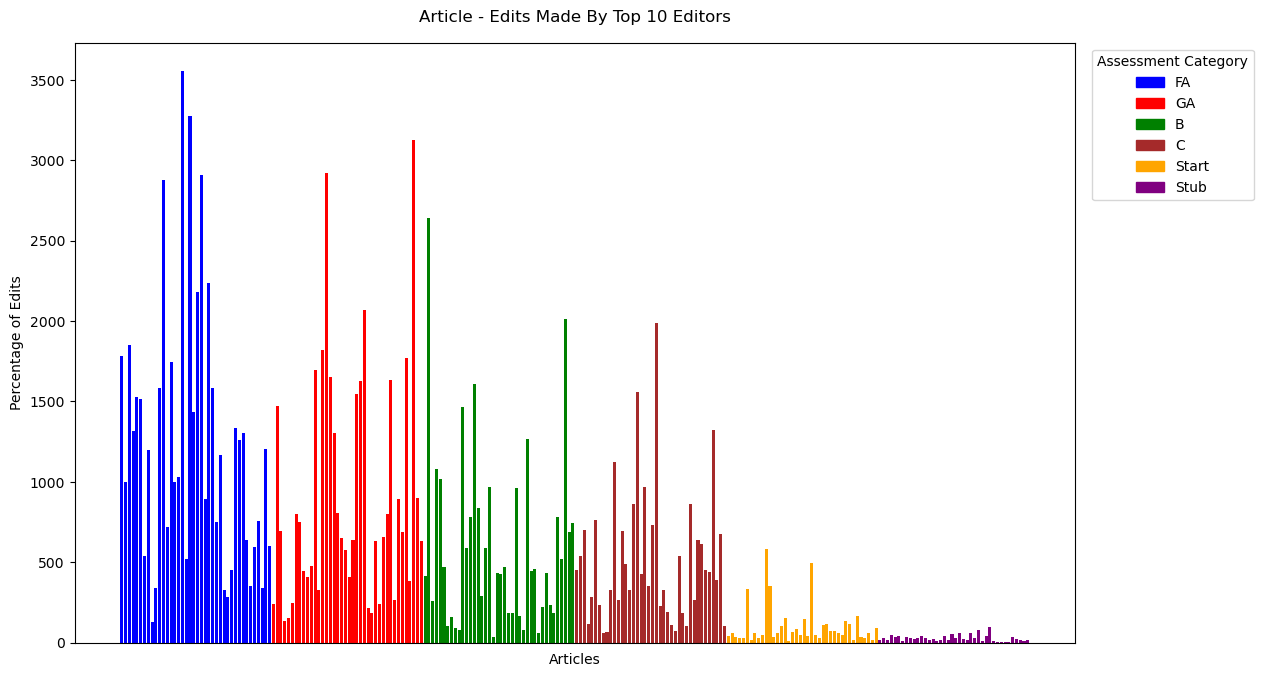

In [18]:
# Assigning colours to each bar based on Article Grade 

col = []

for value in train_df['Assessment Grade']:
    if value == 'FA':
        col.append('blue')
    if value == 'GA':
        col.append('red')
    if value == 'B':
        col.append('green')
    if value == 'C':
        col.append('brown')
    if value == 'Start':
        col.append('orange')
    if value == 'Stub':
        col.append('purple')
        
# Plotting Graph 

fig = plt.figure(figsize = (10, 6))
ax = fig.add_axes([0, 0, 1, 1])
        
ax.bar(train_df['Title'], train_df['Edits Made By Top 10'], color = col)

# Setting all Labels 

ax.set_xticks([])
ax.set_title('Article - Edits Made By Top 10 Editors', pad = 15)
ax.set_ylabel('Percentage of Edits')
ax.set_xlabel('Articles')

# Creating Legend to show Categories

FA = mpatches.Patch(color = 'blue', label = 'FA')
GA = mpatches.Patch(color = 'red', label = 'GA')
B = mpatches.Patch(color = 'green', label = 'B')
C = mpatches.Patch(color = 'brown', label = 'C')
Start = mpatches.Patch(color = 'orange', label = 'Start')
Stub = mpatches.Patch(color = 'purple', label = 'Stub')

# Adding the Legend to the Axis 

ax.legend(handles = [FA, GA, B, C, Start, Stub], title = 'Assessment Category', bbox_to_anchor = (1.01, 1), loc = 'upper left')

# Saving the graph for use in Report 

plt.savefig('EditsTopTen.png', bbox_inches = 'tight')

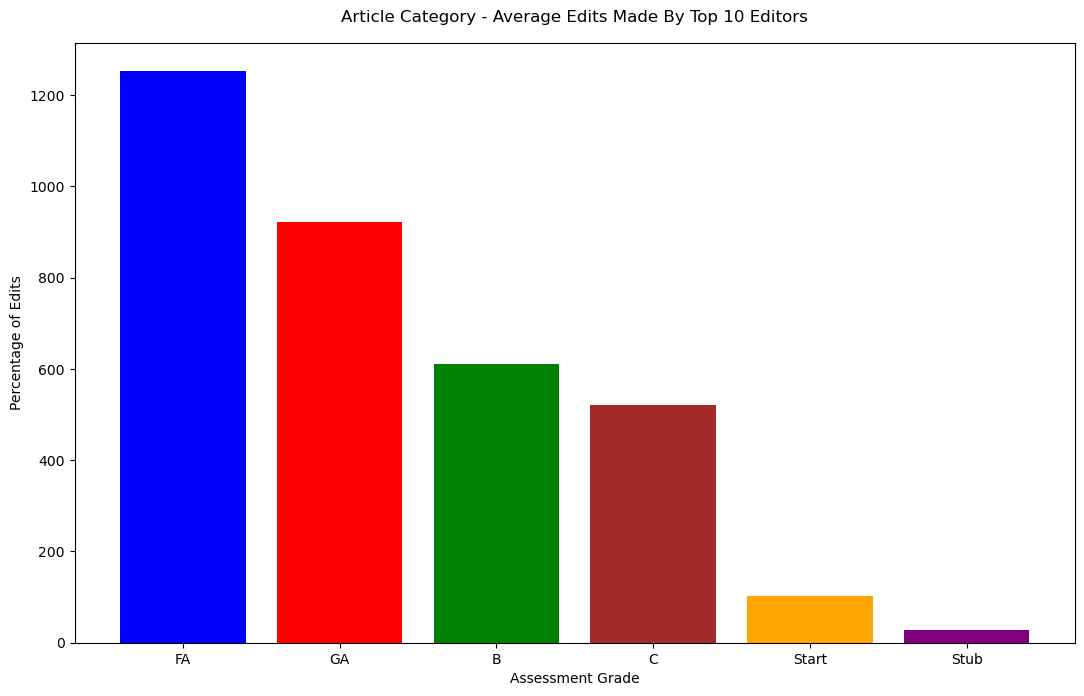

In [19]:
# Creating Pivot Table with averages

top_ten_prc_pt = pd.pivot_table(
                                 train_df, 
                                 values = ['Edits Made By Top 10'], 
                                 index = ['Assessment Grade'],
                                 aggfunc = { 'Edits Made By Top 10': np.mean }
                               )

# Sort the Pivot Table

top_ten_prc_pt = top_ten_prc_pt.reindex(['FA', 'GA', 'B', 'C', 'Start', 'Stub'])

# Assigning colours to each bar based on Article Grade 

col = []

for value in top_ten_prc_pt.index:
    if value == 'FA':
        col.append('blue')
    if value == 'GA':
        col.append('red')
    if value == 'B':
        col.append('green')
    if value == 'C':
        col.append('brown')
    if value == 'Start':
        col.append('orange')
    if value == 'Stub':
        col.append('purple')

# Plotting Graph 

fig = plt.figure(figsize = (10, 6))
ax = fig.add_axes([0, 0, 1, 1])

ax.bar(top_ten_prc_pt.index, top_ten_prc_pt['Edits Made By Top 10'], color = col)

# Setting all Labels

ax.set_title("Article Category - Average Edits Made By Top 10 Editors", pad = 15)
ax.set_xlabel("Assessment Grade")
ax.set_ylabel("Percentage of Edits")

# Saving the graph for use in Report 

plt.savefig('AverageTopTen.png', bbox_inches = 'tight')

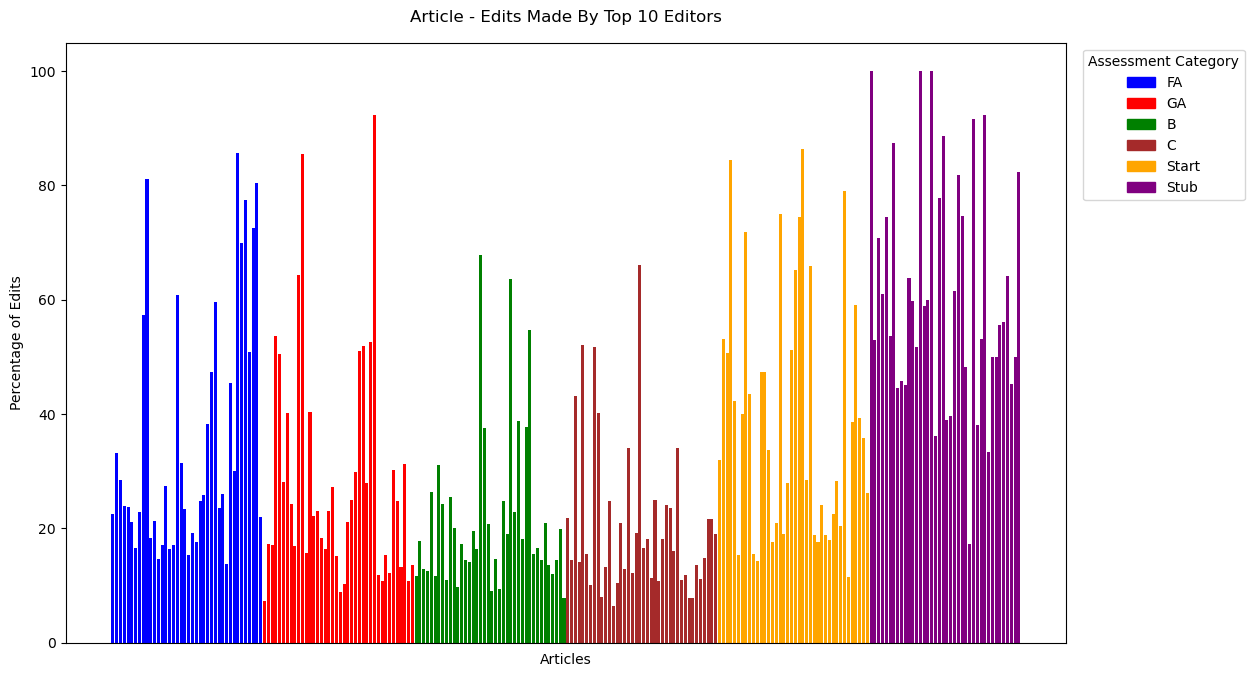

In [20]:
# Assigning colours to each bar based on Article Grade 

col = []

for value in prc_df['Assessment Grade']:
    if value == 'FA':
        col.append('blue')
    if value == 'GA':
        col.append('red')
    if value == 'B':
        col.append('green')
    if value == 'C':
        col.append('brown')
    if value == 'Start':
        col.append('orange')
    if value == 'Stub':
        col.append('purple')
        
# Plotting Graph 

fig = plt.figure(figsize = (10, 6))
ax = fig.add_axes([0, 0, 1, 1])
        
ax.bar(prc_df['Title'], prc_df['Edits Made By Top 10'], color = col)

# Setting all Labels 

ax.set_xticks([])
ax.set_title('Article - Edits Made By Top 10 Editors', pad = 15)
ax.set_ylabel('Percentage of Edits')
ax.set_xlabel('Articles')

# Creating Legend to show Categories

FA = mpatches.Patch(color = 'blue', label = 'FA')
GA = mpatches.Patch(color = 'red', label = 'GA')
B = mpatches.Patch(color = 'green', label = 'B')
C = mpatches.Patch(color = 'brown', label = 'C')
Start = mpatches.Patch(color = 'orange', label = 'Start')
Stub = mpatches.Patch(color = 'purple', label = 'Stub')

# Adding the Legend to the Axis 

ax.legend(handles = [FA, GA, B, C, Start, Stub], title = 'Assessment Category', bbox_to_anchor = (1.01, 1), loc = 'upper left')

# Saving the graph for use in Report 

plt.savefig('EditsTopTen.png', bbox_inches = 'tight')

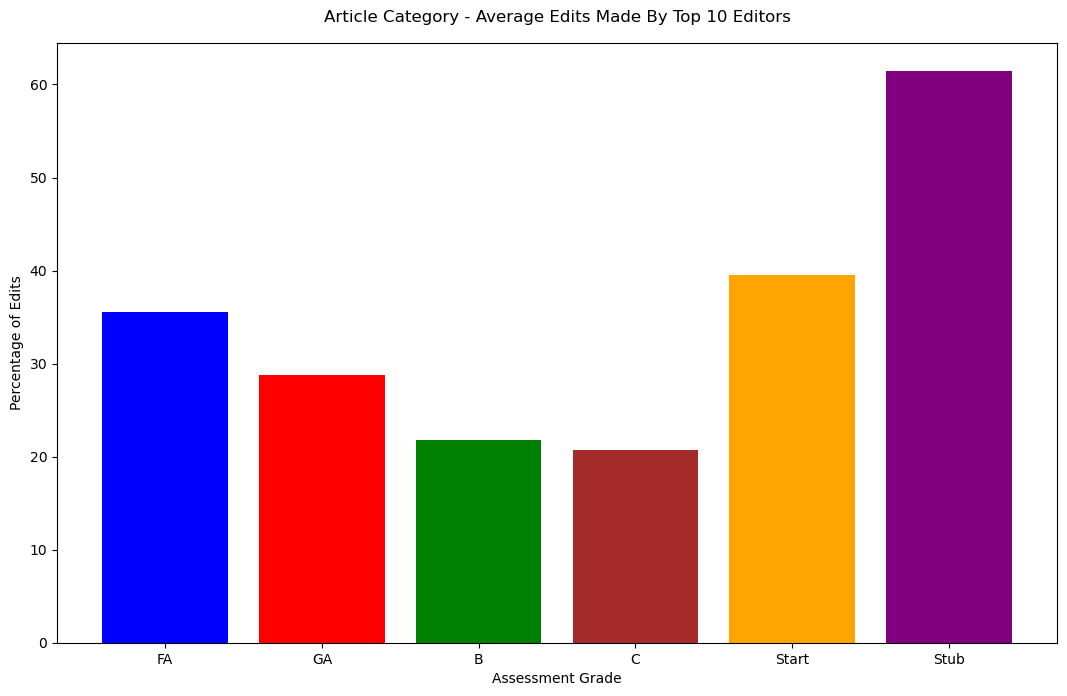

In [21]:
# Creating Pivot Table with averages

top_ten_prc_pt = pd.pivot_table(
                                 prc_df, 
                                 values = ['Edits Made By Top 10'], 
                                 index = ['Assessment Grade'],
                                 aggfunc = { 'Edits Made By Top 10': np.mean }
                               )

# Sort the Pivot Table

top_ten_prc_pt = top_ten_prc_pt.reindex(['FA', 'GA', 'B', 'C', 'Start', 'Stub'])

# Assigning colours to each bar based on Article Grade 

col = []

for value in top_ten_prc_pt.index:
    if value == 'FA':
        col.append('blue')
    if value == 'GA':
        col.append('red')
    if value == 'B':
        col.append('green')
    if value == 'C':
        col.append('brown')
    if value == 'Start':
        col.append('orange')
    if value == 'Stub':
        col.append('purple')

# Plotting Graph 

fig = plt.figure(figsize = (10, 6))
ax = fig.add_axes([0, 0, 1, 1])

ax.bar(top_ten_prc_pt.index, top_ten_prc_pt['Edits Made By Top 10'], color = col)

# Setting all Labels

ax.set_title("Article Category - Average Edits Made By Top 10 Editors", pad = 15)
ax.set_xlabel("Assessment Grade")
ax.set_ylabel("Percentage of Edits")

# Saving the graph for use in Report 

plt.savefig('AverageTopTen.png', bbox_inches = 'tight')

### Major vs Minor Edits

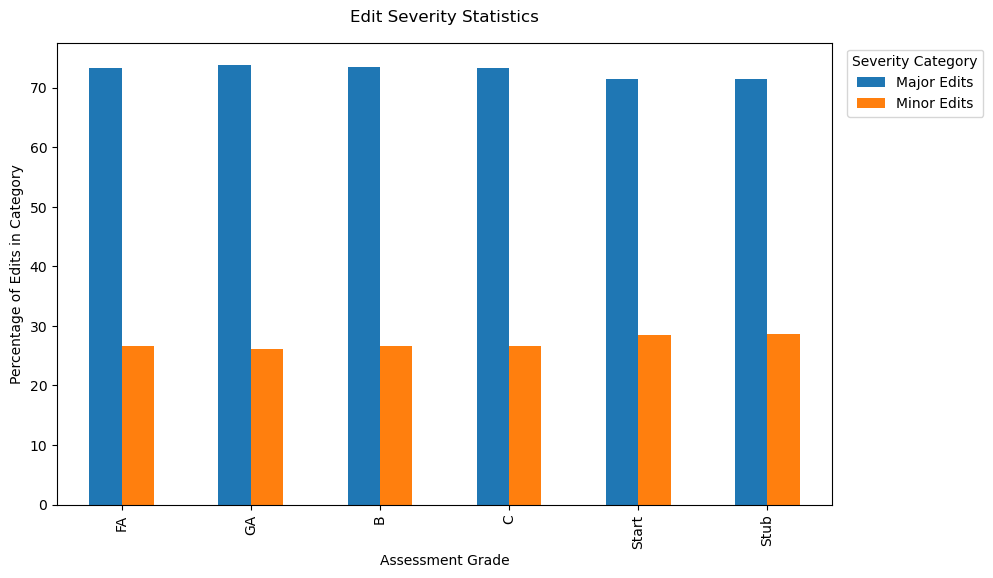

In [22]:
# Creating Pivot Table with averages

severity_pt = pd.pivot_table(
                                prc_df, 
                                values = ['Major Edits', 'Minor Edits'], 
                                index = ['Assessment Grade'],
                                aggfunc = { 'Major Edits': np.mean, 'Minor Edits': np.mean }
                              )

# Sort the Pivot Table

severity_pt = severity_pt.reindex(['FA', 'GA', 'B', 'C', 'Start', 'Stub'])

# Plotting Graph 

ax = severity_pt.plot(kind = 'bar')
fig = ax.get_figure()

# Graph Formatting 

fig.set_size_inches(10, 6)

ax.set_title("Edit Severity Statistics", pad = 15)
ax.set_xlabel("Assessment Grade")
ax.set_ylabel("Percentage of Edits in Category")

# Adding the Legend to the Axis 

ax.legend(title = 'Severity Category', bbox_to_anchor = (1.01, 1), loc = 'upper left')

# Saving the graph for use in Report 

plt.savefig('MajorVsMinor.png', bbox_inches = 'tight')

### Reverted Edits 

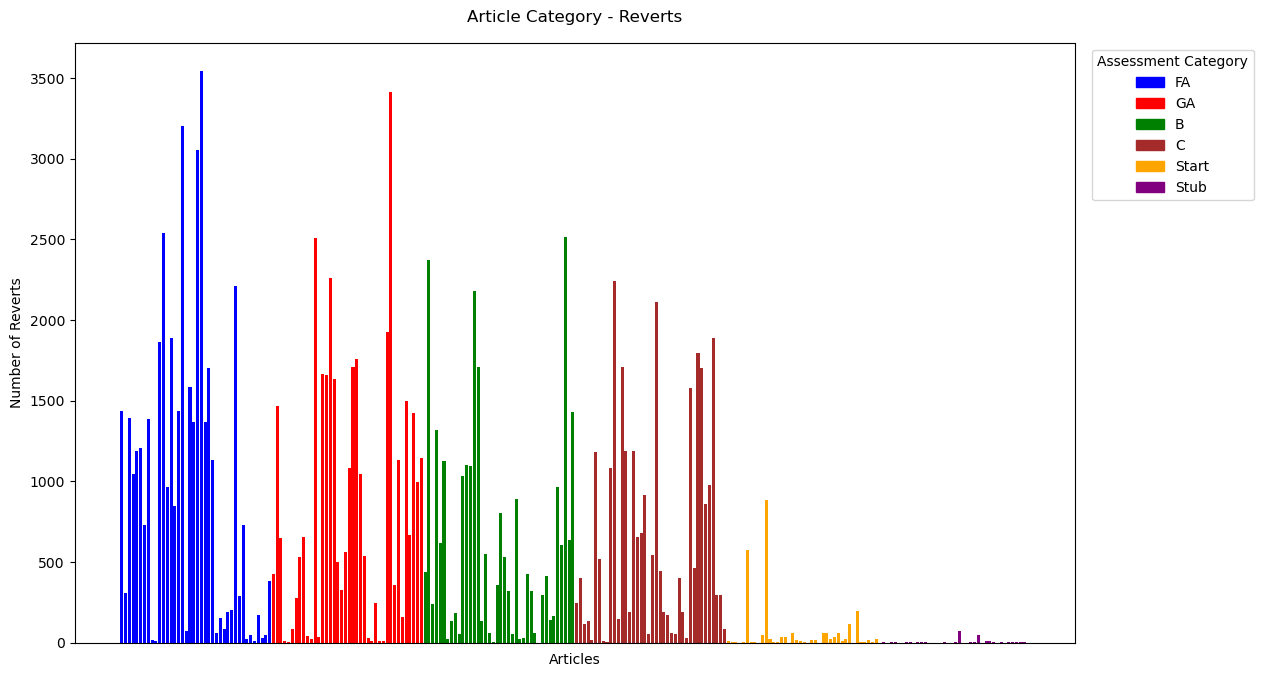

In [23]:
# Assigning colours to each bar based on Article Grade 

col = []

for value in train_df['Assessment Grade']:
    if value == 'FA':
        col.append('blue')
    if value == 'GA':
        col.append('red')
    if value == 'B':
        col.append('green')
    if value == 'C':
        col.append('brown')
    if value == 'Start':
        col.append('orange')
    if value == 'Stub':
        col.append('purple')
        
# Plotting Graph 

fig = plt.figure(figsize = (10, 6))
ax = fig.add_axes([0, 0, 1, 1])
        
ax.bar(train_df['Title'], train_df['Reverted Edits'], color = col)

# Setting all Labels 

ax.set_xticks([])
ax.set_title('Article Category - Reverts', pad = 15)
ax.set_ylabel('Number of Reverts')
ax.set_xlabel('Articles')

# Creating Legend to show Categories

FA = mpatches.Patch(color = 'blue', label = 'FA')
GA = mpatches.Patch(color = 'red', label = 'GA')
B = mpatches.Patch(color = 'green', label = 'B')
C = mpatches.Patch(color = 'brown', label = 'C')
Start = mpatches.Patch(color = 'orange', label = 'Start')
Stub = mpatches.Patch(color = 'purple', label = 'Stub')

# Adding the Legend to the Axis 

ax.legend(handles = [FA, GA, B, C, Start, Stub], title = 'Assessment Category', bbox_to_anchor = (1.01, 1), loc = 'upper left')

# Saving the graph for use in Report 

plt.savefig('Reverts.png', bbox_inches = 'tight')

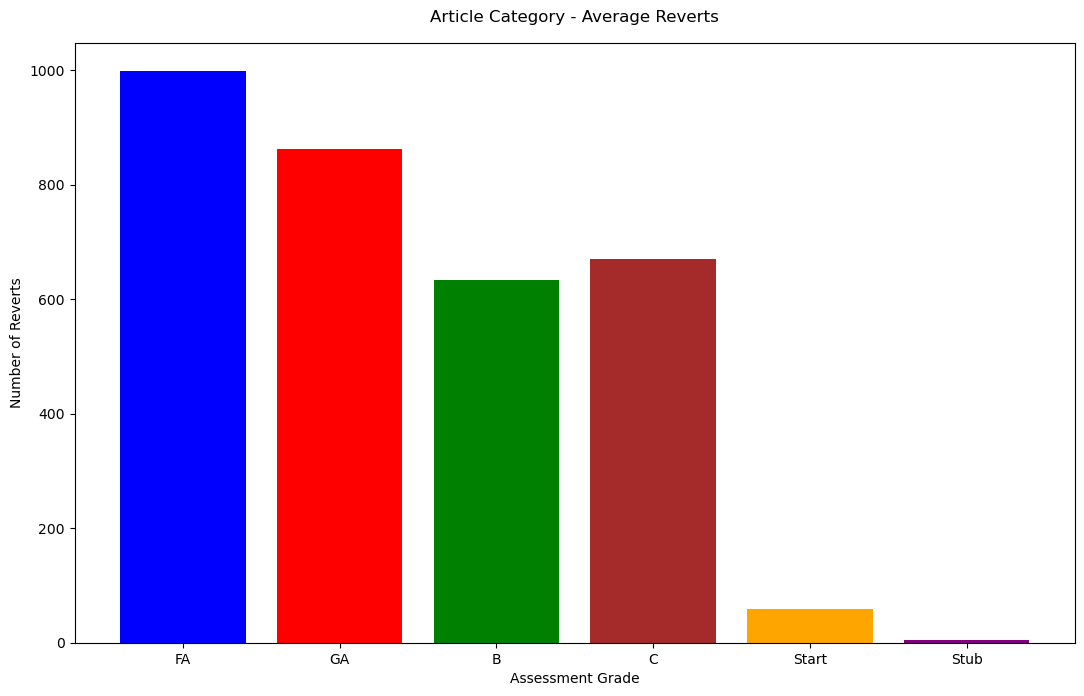

In [24]:
# Creating Pivot Table with averages

reverts_pt = pd.pivot_table(
                                train_df, 
                                values = ['Reverted Edits'], 
                                index = ['Assessment Grade'],
                                aggfunc = { 'Reverted Edits': np.mean }
                              )

# Sort the Pivot Table

reverts_pt = reverts_pt.reindex(['FA', 'GA', 'B', 'C', 'Start', 'Stub'])

# Assigning colours to each bar based on Article Grade 

col = []

for value in reverts_pt.index:
    if value == 'FA':
        col.append('blue')
    if value == 'GA':
        col.append('red')
    if value == 'B':
        col.append('green')
    if value == 'C':
        col.append('brown')
    if value == 'Start':
        col.append('orange')
    if value == 'Stub':
        col.append('purple')

# Plotting Graph 

fig = plt.figure(figsize = (10, 6))
ax = fig.add_axes([0, 0, 1, 1])

ax.bar(reverts_pt.index, reverts_pt['Reverted Edits'], color = col)

# Setting all Labels

ax.set_title("Article Category - Average Reverts", pad = 15)
ax.set_xlabel("Assessment Grade")
ax.set_ylabel("Number of Reverts")

# Saving the graph for use in Report 

plt.savefig('AverageReverts.png', bbox_inches = 'tight')

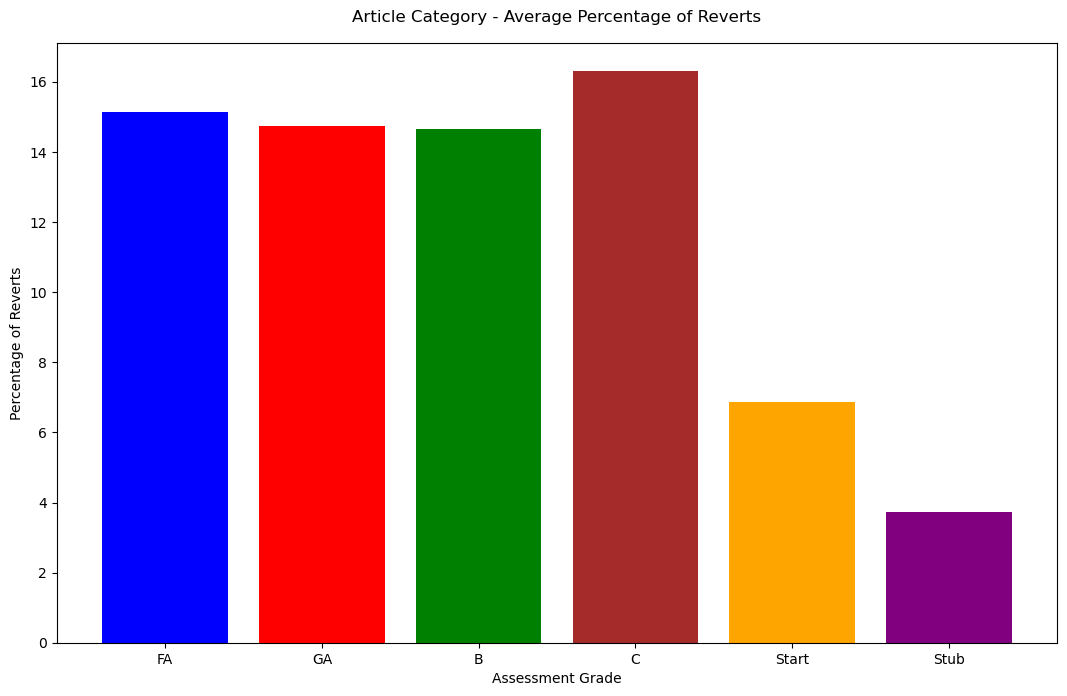

In [25]:
# Creating Pivot Table with averages

reverts_prc_pt = pd.pivot_table(
                                 prc_df, 
                                 values = ['Reverted Edits'], 
                                 index = ['Assessment Grade'],
                                 aggfunc = { 'Reverted Edits': np.mean }
                               )

# Sort the Pivot Table

reverts_prc_pt = reverts_prc_pt.reindex(['FA', 'GA', 'B', 'C', 'Start', 'Stub'])

# Assigning colours to each bar based on Article Grade 

col = []

for value in reverts_prc_pt.index:
    if value == 'FA':
        col.append('blue')
    if value == 'GA':
        col.append('red')
    if value == 'B':
        col.append('green')
    if value == 'C':
        col.append('brown')
    if value == 'Start':
        col.append('orange')
    if value == 'Stub':
        col.append('purple')

# Plotting Graph 

fig = plt.figure(figsize = (10, 6))
ax = fig.add_axes([0, 0, 1, 1])

ax.bar(reverts_prc_pt.index, reverts_prc_pt['Reverted Edits'], color = col)

# Setting all Labels

ax.set_title("Article Category - Average Percentage of Reverts", pad = 15)
ax.set_xlabel("Assessment Grade")
ax.set_ylabel("Percentage of Reverts")

# Saving the graph for use in Report 

plt.savefig('AverageReverts.png', bbox_inches = 'tight')

## Exploratory Data Analysis Plots for Editor Features

#### Full discussion on these plots can be found in the final report

### Unique registered, IP and Bot editors

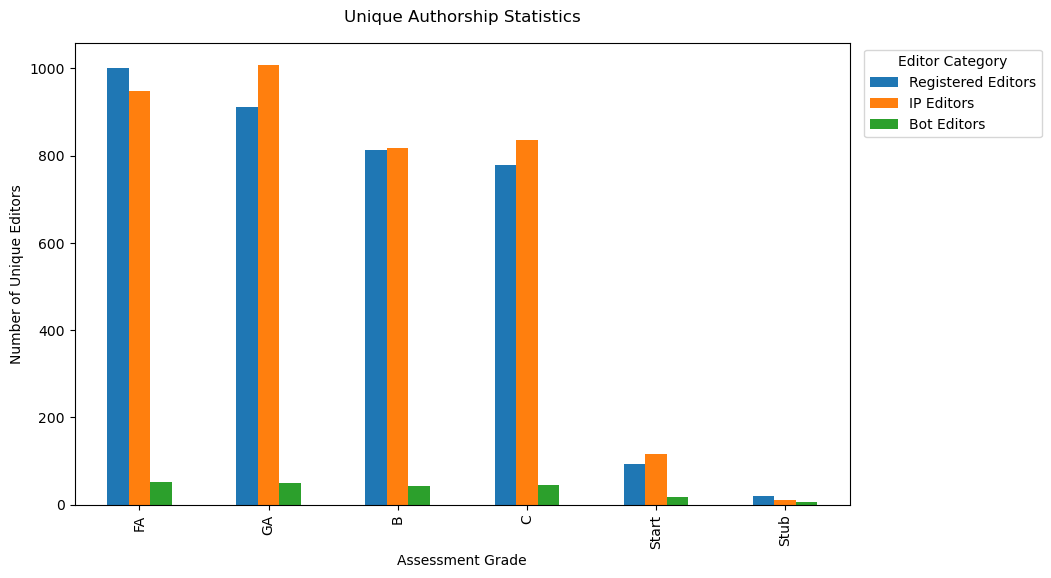

In [26]:
# Creating Pivot Table with averages

editors_pt = pd.pivot_table(
                                train_df, 
                                values = ['Registered Editors', 'IP Editors', 'Bot Editors'], 
                                index = ['Assessment Grade'],
                                aggfunc = { 'Registered Editors': np.mean, 'IP Editors': np.mean, 'Bot Editors': np.mean }
                              )

# Sort the Pivot Table

editors_pt = editors_pt.reindex(['Registered Editors', 'IP Editors', 'Bot Editors'], axis = 1)
editors_pt = editors_pt.reindex(['FA', 'GA', 'B', 'C', 'Start', 'Stub'])

# Plotting Graph 

ax = editors_pt.plot(kind = 'bar')
fig = ax.get_figure()

# Graph Formatting 

fig.set_size_inches(10, 6)

ax.set_title("Unique Authorship Statistics", pad = 15)
ax.set_xlabel("Assessment Grade")
ax.set_ylabel("Number of Unique Editors")

# Adding the Legend to the Axis 

ax.legend(title = 'Editor Category', bbox_to_anchor = (1.01, 1), loc = 'upper left')

# Saving the graph for use in Report 

plt.savefig('UniqueAuthorship.png', bbox_inches = 'tight')

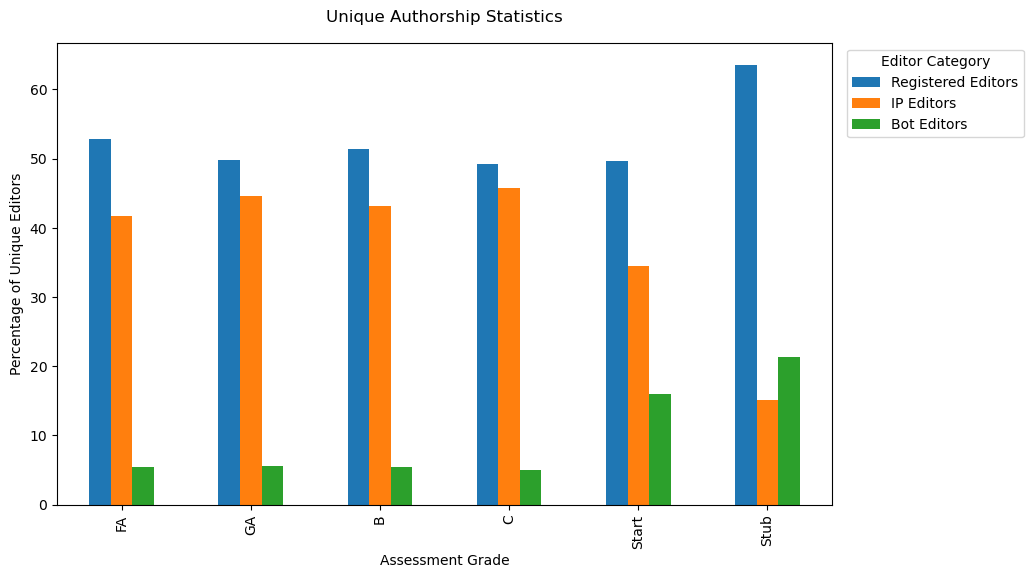

In [27]:
# Creating Pivot Table with averages

editors_pt = pd.pivot_table(
                                prc_df, 
                                values = ['Registered Editors', 'IP Editors', 'Bot Editors'], 
                                index = ['Assessment Grade'],
                                aggfunc = { 'Registered Editors': np.mean, 'IP Editors': np.mean, 'Bot Editors': np.mean }
                              )

# Sort the Pivot Table

editors_pt = editors_pt.reindex(['Registered Editors', 'IP Editors', 'Bot Editors'], axis = 1)
editors_pt = editors_pt.reindex(['FA', 'GA', 'B', 'C', 'Start', 'Stub'])

# Plotting Graph 

ax = editors_pt.plot(kind = 'bar')
fig = ax.get_figure()

# Graph Formatting 

fig.set_size_inches(10, 6)

ax.set_title("Unique Authorship Statistics", pad = 15)
ax.set_xlabel("Assessment Grade")
ax.set_ylabel("Percentage of Unique Editors")

# Adding the Legend to the Axis 

ax.legend(title = 'Editor Category', bbox_to_anchor = (1.01, 1), loc = 'upper left')

# Saving the graph for use in Report 

plt.savefig('UniqueAuthorship.png', bbox_inches = 'tight')

### Average edits per user

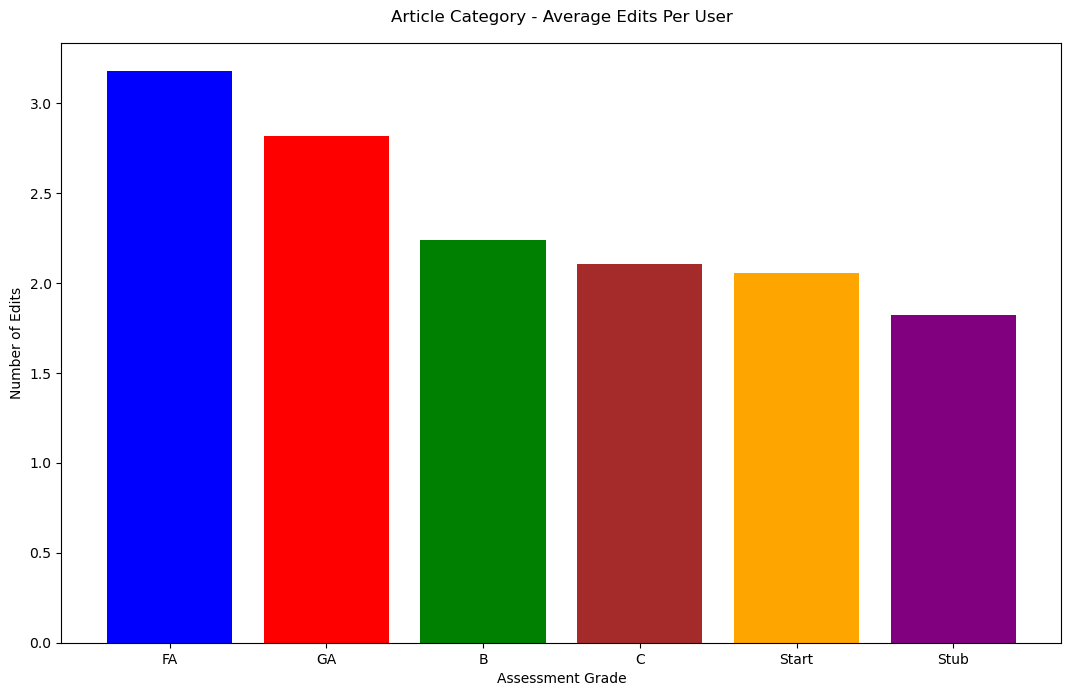

In [28]:
# Creating Pivot Table with averages

avg_user_edits_pt = pd.pivot_table(
                                    train_df, 
                                    values = ['Average Edits Per User'], 
                                    index = ['Assessment Grade'],
                                    aggfunc = { 'Average Edits Per User': np.mean }
                                   )

# Sort the Pivot Table

avg_user_edits_pt = avg_user_edits_pt.reindex(['FA', 'GA', 'B', 'C', 'Start', 'Stub'])

# Assigning colours to each bar based on Article Grade 

col = []

for value in avg_user_edits_pt.index:
    if value == 'FA':
        col.append('blue')
    if value == 'GA':
        col.append('red')
    if value == 'B':
        col.append('green')
    if value == 'C':
        col.append('brown')
    if value == 'Start':
        col.append('orange')
    if value == 'Stub':
        col.append('purple')

# Plotting Graph 

fig = plt.figure(figsize = (10, 6))
ax = fig.add_axes([0, 0, 1, 1])

ax.bar(avg_user_edits_pt.index, avg_user_edits_pt['Average Edits Per User'], color = col)

# Setting all Labels

ax.set_title("Article Category - Average Edits Per User", pad = 15)
ax.set_xlabel("Assessment Grade")
ax.set_ylabel("Number of Edits")

# Saving the graph for use in Report 

plt.savefig('UserAverageEdits.png', bbox_inches = 'tight')

## Exploratory Data Analysis Plots for Temporal Features

#### Full discussion on these plots can be found in the final report

### Average Time Between Edits

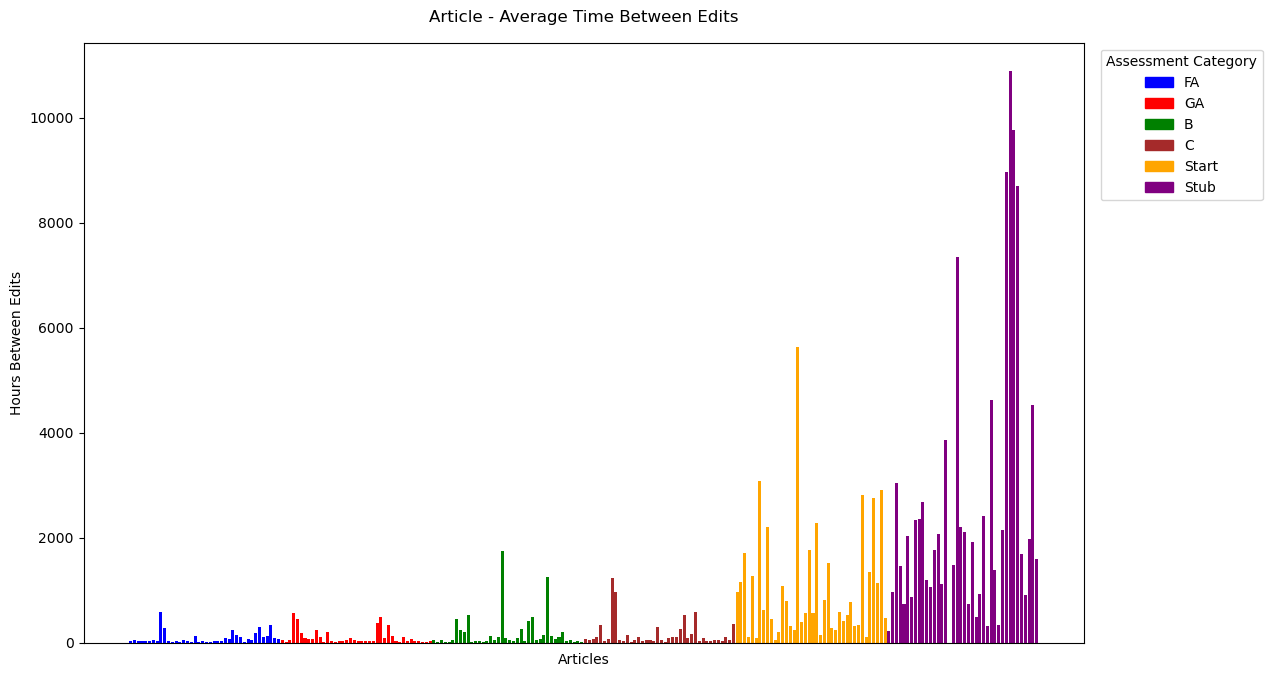

In [29]:
# Assigning colours to each bar based on Article Grade 

col = []

for value in train_df['Assessment Grade']:
    if value == 'FA':
        col.append('blue')
    if value == 'GA':
        col.append('red')
    if value == 'B':
        col.append('green')
    if value == 'C':
        col.append('brown')
    if value == 'Start':
        col.append('orange')
    if value == 'Stub':
        col.append('purple')
        
# Plotting Graph 

fig = plt.figure(figsize = (10, 6))
ax = fig.add_axes([0, 0, 1, 1])
        
ax.bar(train_df['Title'], train_df['Average Time Between Edits'], color = col)

# Setting all Labels 

ax.set_xticks([])
ax.set_title('Article - Average Time Between Edits', pad = 15)
ax.set_ylabel('Hours Between Edits')
ax.set_xlabel('Articles')

# Creating Legend to show Categories

FA = mpatches.Patch(color = 'blue', label = 'FA')
GA = mpatches.Patch(color = 'red', label = 'GA')
B = mpatches.Patch(color = 'green', label = 'B')
C = mpatches.Patch(color = 'brown', label = 'C')
Start = mpatches.Patch(color = 'orange', label = 'Start')
Stub = mpatches.Patch(color = 'purple', label = 'Stub')

# Adding the Legend to the Axis 

ax.legend(handles = [FA, GA, B, C, Start, Stub], title = 'Assessment Category', bbox_to_anchor = (1.01, 1), loc = 'upper left')

# Saving the graph for use in Report 

plt.savefig('TimeBetweenEdits.png', bbox_inches = 'tight')

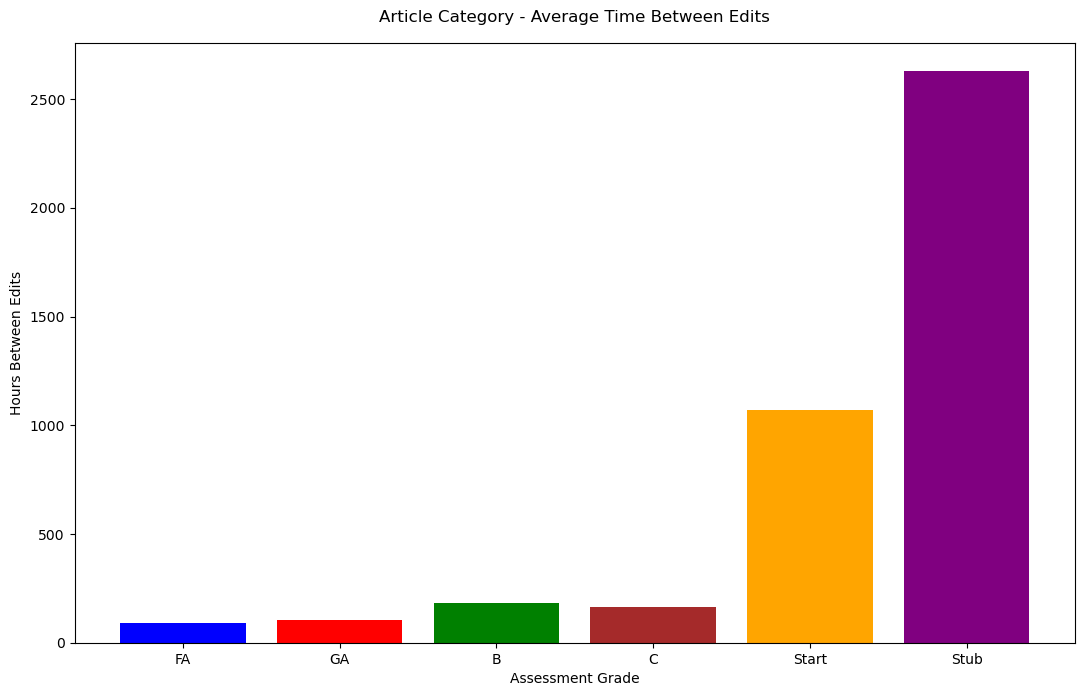

In [30]:
# Creating Pivot Table with averages

avg_time_pt = pd.pivot_table(
                                train_df, 
                                values = ['Average Time Between Edits'], 
                                index = ['Assessment Grade'],
                                aggfunc = { 'Average Time Between Edits': np.mean }
                            )

# Sort the Pivot Table

avg_time_pt = avg_time_pt.reindex(['FA', 'GA', 'B', 'C', 'Start', 'Stub'])

# Assigning colours to each bar based on Article Grade 

col = []

for value in avg_time_pt.index:
    if value == 'FA':
        col.append('blue')
    if value == 'GA':
        col.append('red')
    if value == 'B':
        col.append('green')
    if value == 'C':
        col.append('brown')
    if value == 'Start':
        col.append('orange')
    if value == 'Stub':
        col.append('purple')

# Plotting Graph 

fig = plt.figure(figsize = (10, 6))
ax = fig.add_axes([0, 0, 1, 1])

ax.bar(avg_time_pt.index, avg_time_pt['Average Time Between Edits'], color = col)

# Setting all Labels

ax.set_title("Article Category - Average Time Between Edits", pad = 15)
ax.set_xlabel("Assessment Grade")
ax.set_ylabel("Hours Between Edits")

# Saving the graph for use in Report 

plt.savefig('AverageTimeBetweenEdits.png', bbox_inches = 'tight')

### Average Edits per Day

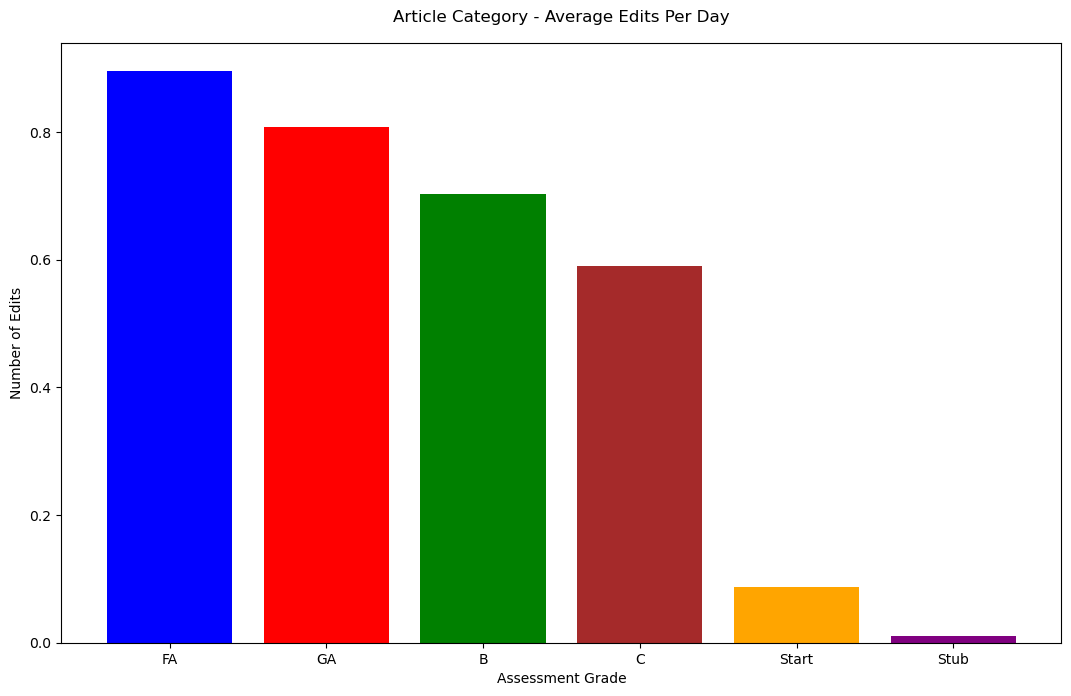

In [31]:
# Creating Pivot Table with averages

avg_daily_edits_pt = pd.pivot_table(
                                    train_df, 
                                    values = ['Average Edits Per Day'], 
                                    index = ['Assessment Grade'],
                                    aggfunc = { 'Average Edits Per Day': np.mean }
                                   )

# Sort the Pivot Table

avg_daily_edits_pt = avg_daily_edits_pt.reindex(['FA', 'GA', 'B', 'C', 'Start', 'Stub'])

# Assigning colours to each bar based on Article Grade 

col = []

for value in avg_daily_edits_pt.index:
    if value == 'FA':
        col.append('blue')
    if value == 'GA':
        col.append('red')
    if value == 'B':
        col.append('green')
    if value == 'C':
        col.append('brown')
    if value == 'Start':
        col.append('orange')
    if value == 'Stub':
        col.append('purple')

# Plotting Graph 

fig = plt.figure(figsize = (10, 6))
ax = fig.add_axes([0, 0, 1, 1])

ax.bar(avg_daily_edits_pt.index, avg_daily_edits_pt['Average Edits Per Day'], color = col)

# Setting all Labels

ax.set_title("Article Category - Average Edits Per Day", pad = 15)
ax.set_xlabel("Assessment Grade")
ax.set_ylabel("Number of Edits")

# Saving the graph for use in Report 

plt.savefig('DailyAverageEdits.png', bbox_inches = 'tight')

### Average Edits per Month

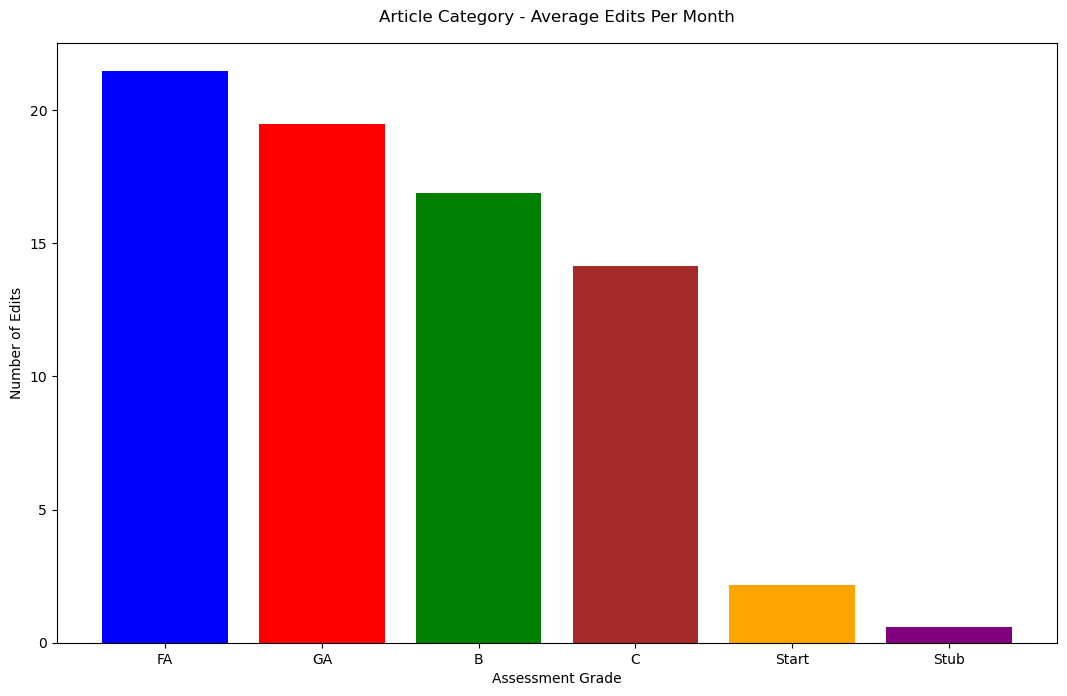

In [32]:
# Creating Pivot Table with averages

avg_monthly_edits_pt = pd.pivot_table(
                                        train_df, 
                                        values = ['Average Edits Per Month'], 
                                        index = ['Assessment Grade'],
                                        aggfunc = { 'Average Edits Per Month': np.mean }
                                     )

# Sort the Pivot Table

avg_monthly_edits_pt = avg_monthly_edits_pt.reindex(['FA', 'GA', 'B', 'C', 'Start', 'Stub'])

# Assigning colours to each bar based on Article Grade 

col = []

for value in avg_monthly_edits_pt.index:
    if value == 'FA':
        col.append('blue')
    if value == 'GA':
        col.append('red')
    if value == 'B':
        col.append('green')
    if value == 'C':
        col.append('brown')
    if value == 'Start':
        col.append('orange')
    if value == 'Stub':
        col.append('purple')

# Plotting Graph 

fig = plt.figure(figsize = (10, 6))
ax = fig.add_axes([0, 0, 1, 1])

ax.bar(avg_monthly_edits_pt.index, avg_monthly_edits_pt['Average Edits Per Month'], color = col)

# Setting all Labels

ax.set_title("Article Category - Average Edits Per Month", pad = 15)
ax.set_xlabel("Assessment Grade")
ax.set_ylabel("Number of Edits")

# Saving the graph for use in Report 

plt.savefig('MonthlyAverageEdits.png', bbox_inches = 'tight')

### Average Edits per Year

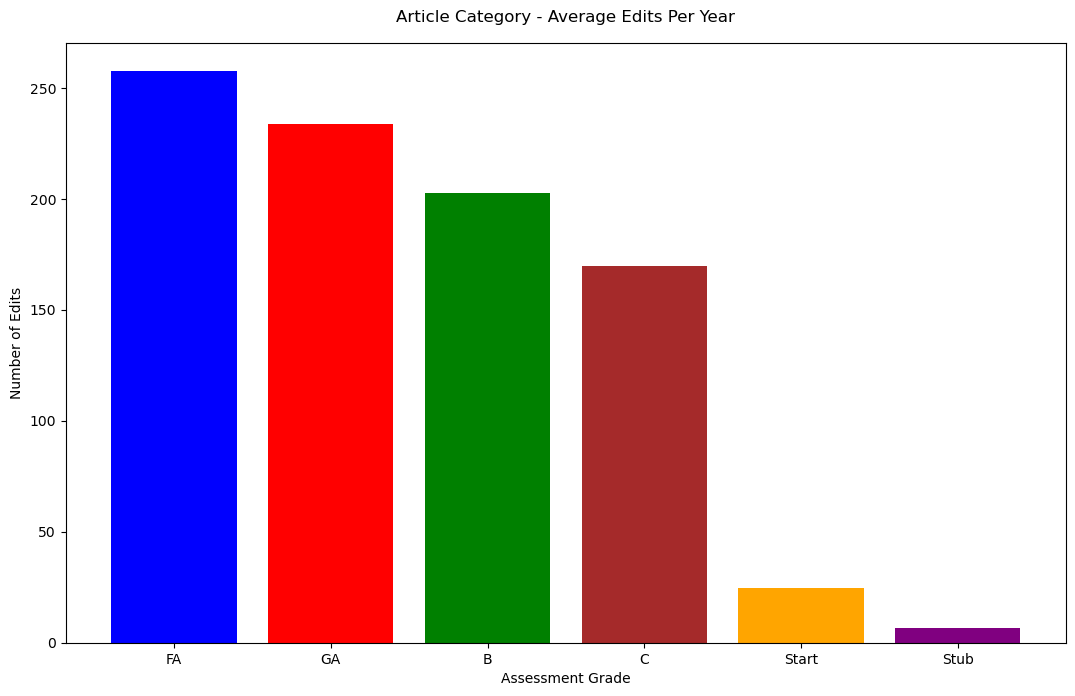

In [33]:
# Creating Pivot Table with averages

avg_yearly_edits_pt = pd.pivot_table(
                                        train_df, 
                                        values = ['Average Edits Per Year'], 
                                        index = ['Assessment Grade'],
                                        aggfunc = { 'Average Edits Per Year': np.mean }
                                     )

# Sort the Pivot Table

avg_yearly_edits_pt = avg_yearly_edits_pt.reindex(['FA', 'GA', 'B', 'C', 'Start', 'Stub'])

# Assigning colours to each bar based on Article Grade 

col = []

for value in avg_yearly_edits_pt.index:
    if value == 'FA':
        col.append('blue')
    if value == 'GA':
        col.append('red')
    if value == 'B':
        col.append('green')
    if value == 'C':
        col.append('brown')
    if value == 'Start':
        col.append('orange')
    if value == 'Stub':
        col.append('purple')

# Plotting Graph 

fig = plt.figure(figsize = (10, 6))
ax = fig.add_axes([0, 0, 1, 1])

ax.bar(avg_yearly_edits_pt.index, avg_yearly_edits_pt['Average Edits Per Year'], color = col)

# Setting all Labels

ax.set_title("Article Category - Average Edits Per Year", pad = 15)
ax.set_xlabel("Assessment Grade")
ax.set_ylabel("Number of Edits")

# Saving the graph for use in Report 

plt.savefig('YearlyAverageEdits.png', bbox_inches = 'tight')

## KNN Classifier Set Up 

### Converting the training and testing fields into percentages where found to be useful

In [34]:
train_df['Registered Edits'] = train_df.apply(lambda x: 100 * (x['Registered Edits'] / x['Revisions']), axis = 1)
train_df['IP Edits'] = train_df.apply(lambda x: 100 * (x['IP Edits'] / x['Revisions']), axis = 1)
train_df['Bot Edits'] = train_df.apply(lambda x: 100 * (x['Bot Edits'] / x['Revisions']), axis = 1)

train_df['Edits Made By Top 10'] = train_df.apply(lambda x: 100 * (x['Edits Made By Top 10'] / x['Revisions']), axis = 1)

train_df['Registered Editors'] = train_df.apply(lambda x: 100 * (x['Registered Editors'] / x['Unique Editors']), axis = 1)
train_df['IP Editors'] = train_df.apply(lambda x: 100 * (x['IP Editors'] / x['Unique Editors']), axis = 1)
train_df['Bot Editors'] = train_df.apply(lambda x: 100 * (x['Bot Editors'] / x['Unique Editors']), axis = 1)

In [35]:
test_df['Registered Edits'] = test_df.apply(lambda x: 100 * (x['Registered Edits'] / x['Revisions']), axis = 1)
test_df['IP Edits'] = test_df.apply(lambda x: 100 * (x['IP Edits'] / x['Revisions']), axis = 1)
test_df['Bot Edits'] = test_df.apply(lambda x: 100 * (x['Bot Edits'] / x['Revisions']), axis = 1)

test_df['Edits Made By Top 10'] = test_df.apply(lambda x: 100 * (x['Edits Made By Top 10'] / x['Revisions']), axis = 1)

test_df['Registered Editors'] = test_df.apply(lambda x: 100 * (x['Registered Editors'] / x['Unique Editors']), axis = 1)
test_df['IP Editors'] = test_df.apply(lambda x: 100 * (x['IP Editors'] / x['Unique Editors']), axis = 1)
test_df['Bot Editors'] = test_df.apply(lambda x: 100 * (x['Bot Editors'] / x['Unique Editors']), axis = 1)

### Removing fields from the dataset based on the analysis

In [36]:
train_X = train_df[['Size in Bytes', 
                    'Revisions', 
                    'Registered Edits', 
                    'IP Edits',
                    'Bot Edits', 
                    'Unique Editors', 
                    # 'Major Edits', 
                    # 'Minor Edits',
                    # 'Semi Auto Edits', 
                    # 'Reverted Edits', 
                    'Average Time Between Edits', 
                    'Average Edits Per User',
                    # 'Average Edits Per Day', 
                    # 'Average Edits Per Month', 
                    'Average Edits Per Year', 
                    'Edits Made By Top 10', 
                    'Registered Editors', 
                    'IP Editors', 
                    'Bot Editors'
                   ]]

train_Y = train_df[['Assessment Grade']]

test_X = test_df[['Size in Bytes', 
                        'Revisions', 
                        'Registered Edits', 
                        'IP Edits',
                        'Bot Edits', 
                        'Unique Editors', 
                        # 'Major Edits', 
                        # 'Minor Edits',
                        # 'Semi Auto Edits', 
                        # 'Reverted Edits', 
                        'Average Time Between Edits', 
                        'Average Edits Per User',
                        # 'Average Edits Per Day', 
                        # 'Average Edits Per Month', 
                        'Average Edits Per Year', 
                        'Edits Made By Top 10', 
                        'Registered Editors', 
                        'IP Editors', 
                        'Bot Editors'
                       ]] 

test_Y = test_df[['Assessment Grade']]

### Scaling both Datasets

In [37]:
# Implementing standard scaler 

scaler = StandardScaler()

# Scaling the X portion of each set

scaled_X_train = scaler.fit_transform(train_X)

scaled_X_test = scaler.fit_transform(test_X)

# Reconverting these back into a dataframe 

scaled_X_train = pd.DataFrame(scaled_X_train, columns = train_X.columns)

scaled_X_test = pd.DataFrame(scaled_X_test, columns = test_X.columns)

# Combining the X and Y portions 

scaled_train_df = pd.concat([train_Y, scaled_X_train], axis = 1)

scaled_test_df = pd.concat([test_Y, scaled_X_test], axis = 1)

## KNN Classification 

In [38]:
# Create an empty array to store the error rates for each value 

error_rates = []

for k in range(1, 30):

    knn_model = KNeighborsClassifier(n_neighbors = k) 
    
    knn_model.fit(scaled_X_train.values, train_Y.values.ravel())

    grade_prediction = []

    for index, row in scaled_test_df.iterrows():
    
        test_value = (row['Size in Bytes'], 
                      row['Revisions'], 
                      row['Registered Edits'], 
                      row['IP Edits'], 
                      row['Bot Edits'], 
                      row['Unique Editors'], 
                      # row['Major Edits'], 
                      # row['Minor Edits'], 
                      # row['Semi Auto Edits'], 
                      # row['Reverted Edits'], 
                      row['Average Time Between Edits'], 
                      row['Average Edits Per User'],
                      # row['Average Edits Per Day'], 
                      # row['Average Edits Per Month'], 
                      row['Average Edits Per Year'], 
                      row['Edits Made By Top 10'], 
                      row['Registered Editors'], 
                      row['IP Editors'], 
                      row['Bot Editors']
                     )
    
        prediction_Y = knn_model.predict([test_value])
    
        grade_prediction.append(prediction_Y[0])
        
    scaled_test_df['Grade Prediction'] = grade_prediction
        
    test_error = 1 - accuracy_score(test_Y, scaled_test_df['Grade Prediction'])
            
    error_rates.append(test_error)

#### Elbow Graph plot on the error rates to find best value for K 

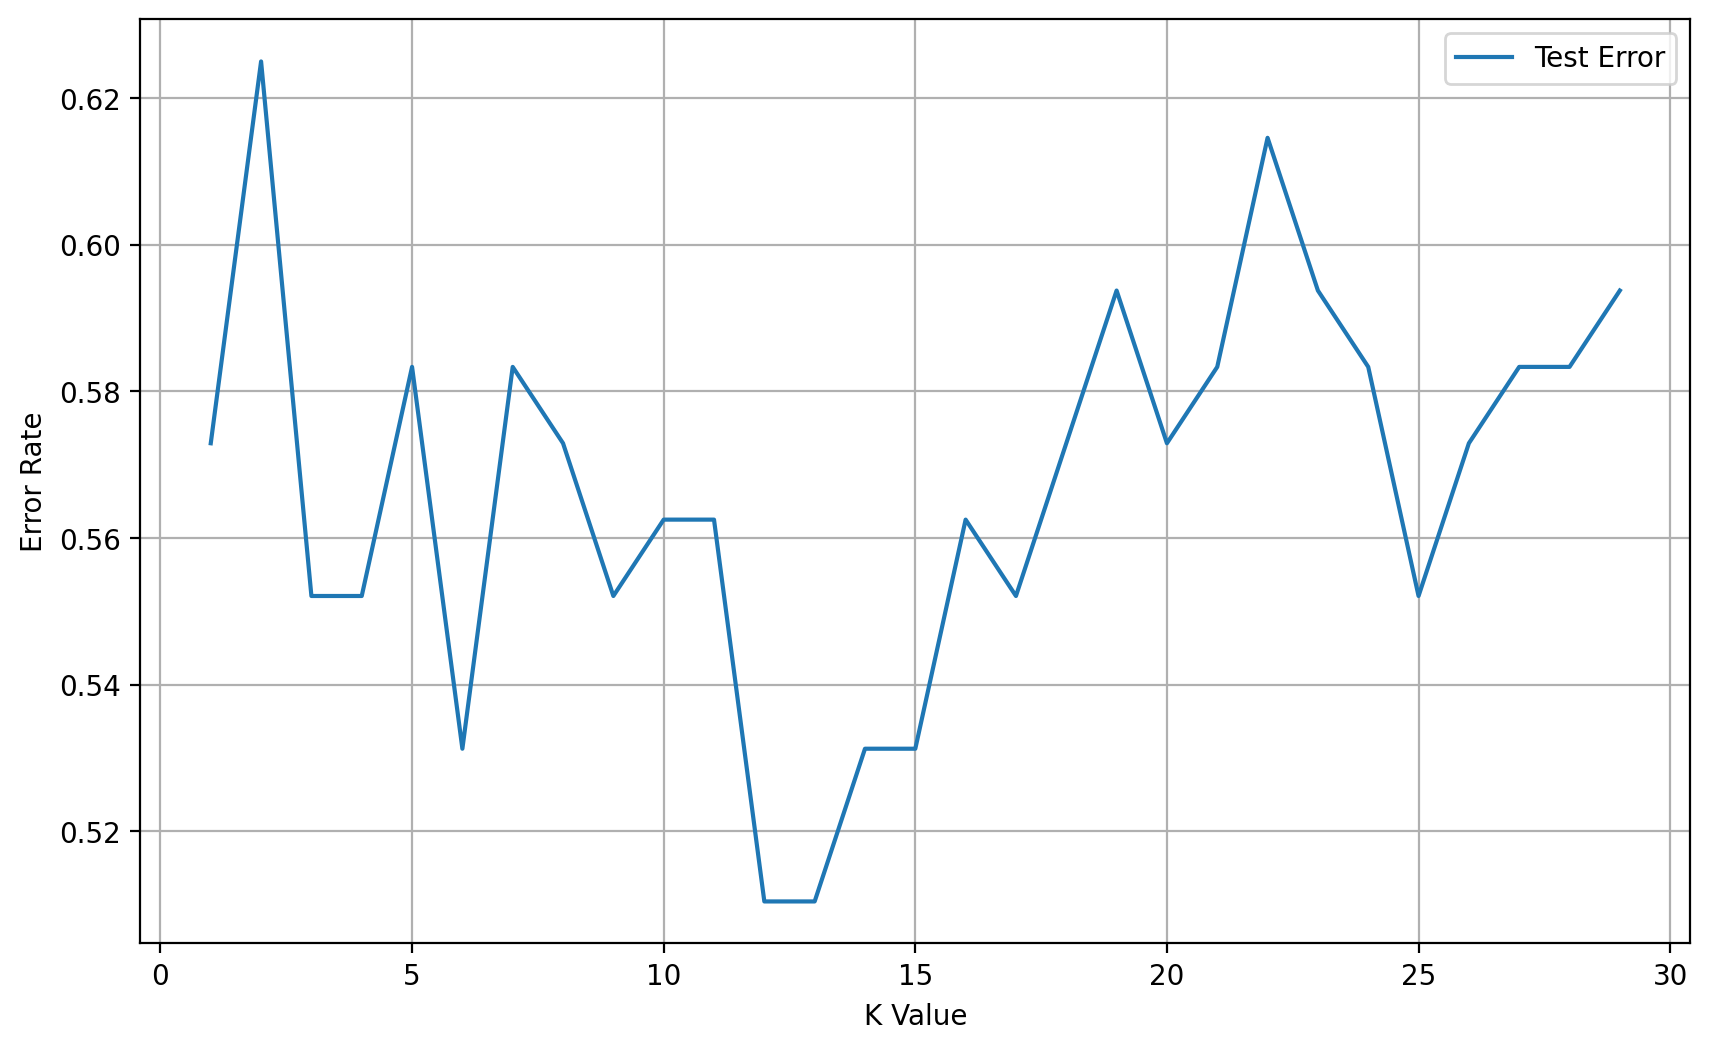

In [39]:
plt.figure(figsize = (10,6), dpi = 200)
plt.plot(range(1, 30), error_rates, label = 'Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")
plt.grid()

## Running KNN for best value of K 

In [40]:
knn_model = KNeighborsClassifier(n_neighbors = 12) 
    
knn_model.fit(scaled_X_train.values, train_Y.values.ravel())

grade_prediction = []

for index, row in scaled_test_df.iterrows():

    test_value = (row['Size in Bytes'], 
                  row['Revisions'], 
                  row['Registered Edits'], 
                  row['IP Edits'], 
                  row['Bot Edits'], 
                  row['Unique Editors'], 
                  # row['Major Edits'], 
                  # row['Minor Edits'], 
                  # row['Semi Auto Edits'], 
                  # row['Reverted Edits'], 
                  row['Average Time Between Edits'], 
                  row['Average Edits Per User'],
                  # row['Average Edits Per Day'], 
                  # row['Average Edits Per Month'], 
                  row['Average Edits Per Year'], 
                  row['Edits Made By Top 10'], 
                  row['Registered Editors'], 
                  row['IP Editors'], 
                  row['Bot Editors']
                 )

    prediction_Y = knn_model.predict([test_value])

    grade_prediction.append(prediction_Y[0])

scaled_test_df['Grade Prediction'] = grade_prediction

accuracy_score = accuracy_score(test_Y, scaled_test_df['Grade Prediction'])

accuraccy = 'Accuracy Score: ' + str(100 * (accuracy_score)) + '%'

accuraccy

'Accuracy Score: 48.95833333333333%'

## Checking the acuraccy score for grades within one value 

In [41]:
scaled_test_df['Within One'] = scaled_test_df.apply(find_grade_within_one, axis = 1)

In [42]:
within_one = 'Accuracy Score: ' + str(100 * (len(scaled_test_df.loc[scaled_test_df['Within One'] == True]) / len(scaled_test_df)))

within_one

'Accuracy Score: 80.20833333333334'